# Computational Methods HT2026 - Week 2. Working with a DataFrame

Before this lab we expect you to have: 
- A Github account
- A working personal computer with Python installed. 
	- For Mac, it is pre-installed. 
	- For Windows, ...
- Download and installed "Visual Studio Code"
- Completed lab 1. 

**Data**: AI Stack Exchange, already collected (placed in `/data/AI_Stack_Posts.feather`)

**Claim**: Distributions vary dramatically on whether they are normal or skewed.

**Representation**: Simple plots and descriptives


# Exercise 1. Getting the data in 

The first excercise is simply getting the data into Python. The data is stored in a file format called "feather". You will likely need to install an additional package. 

Select kernel -> venv -> go to terminal and type: 

~~~bash
pip install pyarrow
~~~

You will also need to install pandas

~~~bash
pip install pandas, matplotlib, scipy
~~~

Then you should be able to run the code below: 

In [3]:
import pandas as pd 
from IPython.display import display, Markdown, HTML
import matplotlib.pyplot as plt
from scipy import stats

stack_df = pd.read_feather('data/AI_Stack_Posts.feather')

display(stack_df.info())

<class 'pandas.DataFrame'>
RangeIndex: 26764 entries, 0 to 26763
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     26764 non-null  str           
 1   PostTypeId             26764 non-null  str           
 2   AcceptedAnswerId       4204 non-null   str           
 3   CreationDate           26764 non-null  datetime64[ns]
 4   Score                  26764 non-null  int64         
 5   ViewCount              12380 non-null  float64       
 6   Body                   26764 non-null  str           
 7   OwnerUserId            26307 non-null  str           
 8   LastEditorUserId       15345 non-null  str           
 9   LastEditDate           15588 non-null  datetime64[ns]
 10  LastActivityDate       26764 non-null  datetime64[ns]
 11  Title                  12380 non-null  str           
 12  Tags                   12380 non-null  str           
 13  AnswerCount 

None

# Exercise 2. Descriptive data 

In this first exercise, we should do some counting. To note, the structure of this file is very similar to the structure found at: https://meta.stackexchange.com/questions/2677/

We can see that there are a couple different kinds of posts. First, count the number of posts and the number of replies. There are a few ways to do this, but I recommend a simple `value_counts()`:

In [4]:
stack_df["PostTypeId"].value_counts()
# stack_df[<...>].value_counts()

PostTypeId
2    12460
1    12380
5      954
4      954
6       13
7        3
Name: count, dtype: int64

In [ ]:
# Create a data set just of the posts: 
# Answer should say at the top: 
# Index: 12380 entries, 0 to 26763

posts_df = stack_df[stack_df["PostTypeId"] == '1'].copy()
# posts_df = stack_df[stack_df["PostTypeId"]== <...>].copy()

print(posts_df.info())

<class 'pandas.DataFrame'>
Index: 12380 entries, 0 to 26763
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     12380 non-null  str           
 1   PostTypeId             12380 non-null  str           
 2   AcceptedAnswerId       4204 non-null   str           
 3   CreationDate           12380 non-null  datetime64[ns]
 4   Score                  12380 non-null  int64         
 5   ViewCount              12380 non-null  float64       
 6   Body                   12380 non-null  str           
 7   OwnerUserId            12201 non-null  str           
 8   LastEditorUserId       8444 non-null   str           
 9   LastEditDate           8522 non-null   datetime64[ns]
 10  LastActivityDate       12380 non-null  datetime64[ns]
 11  Title                  12380 non-null  str           
 12  Tags                   12380 non-null  str           
 13  AnswerCount      

In [6]:
# Check the text of the first post: 
# Answer should display: 
# "What does "backprop" mean? Is the "backprop" term basically the same as "backpropagation" or does it have a different meaning?"

display(HTML(posts_df["Body"].iloc[0]))
# display(HTML(posts_df["Body"].<...>[0]))

# Exercise 3. Cleaning some data 

Let's get the count for the number of characters in a column
Let's get the count for the number of words in a column. 

We should use "BodyText" rather than "Body" as it's been stripped of HTML

In [9]:
# To start let's count the characters for a single entry: 

print(len(posts_df["BodyText"].iloc[0]))
# print(len(posts_df["Body"].<...>[0]))

127


In [ ]:
# Now let's see how to do that for an entire column
# Answer: 127 

posts_df["BodyTextLen"] = posts_df["BodyText"].map(lambda x: len(x))
print(posts_df["BodyTextLen"].iloc[0])

# posts_df["BodyTextLen"] = posts_df["BodyText"].map(lambda x: len(x))
# print(posts_df["BodyTextLen"].<...>[0])


127


In [11]:
# Now it's your turn: Instead of counting the characters let's count the words

posts_df["BodyWordLen"] = posts_df["BodyText"].map(lambda x: len(x.split()))
print(posts_df["BodyWordLen"].iloc[0])

# posts_df["BodyWordLen"] = posts_df["BodyText"].map(lambda x: len(<...>))
# print(posts_df["BodyWordLen"].<...>[0])


20


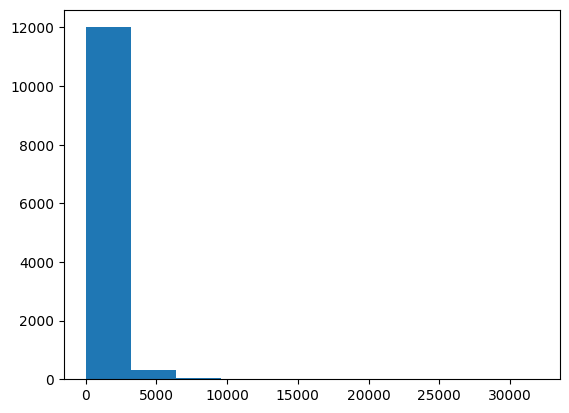

In [12]:
# Exercise 4. Plotting a distribution

plt.hist(posts_df["BodyTextLen"])
plt.show()

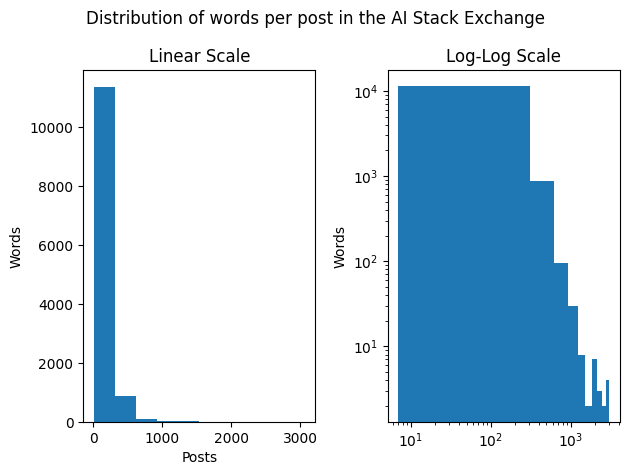

In [13]:
# Now plot the characters. Except we will do it twice! 
# Once on a normal plot. Once on a "log-log" plot

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(posts_df["BodyWordLen"])
ax1.set_title("Linear Scale")
ax1.set_xlabel("Posts") # Added 
ax1.set_ylabel("Words") # Added

ax2.hist(posts_df["BodyWordLen"])
ax2.set_title("Log-Log Scale")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel("Words") # Added

fig.suptitle("Distribution of words per post in the AI Stack Exchange") # Added

plt.tight_layout()
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2)

# ax1.hist(<...>)
# ax1.set_title("<...>")

# ax2.hist(<...>)
# ax2.set_title("<...>")
# ax2.set_xscale("log")
# ax2.<...>("log")

# plt.tight_layout()
# plt.show()


# Question 5 - Descriptive statistics 

For the following, I am not providing starter code (except the one snippet below). Instead, you should be able to piece together the way to do this from the above code. 

5a. Split the posts_df into two separate DataFrames. DataFrame 1 will have posts which have a URL (i.e. `[posts_df[""] > 0]`). DataFrame 2 will have posts which do not (`[posts_df[""] > 0]`). 

5b. Report on the mean, median, and standard deviation of the "Score" column for both. 

5c. How can we compare whether one is 'significantly higher' than the other? Hint: We can use a t-test. But should we use a parametric or non-parametric test?

5d. Plot the histogram of the two series side by side.

```python
# Example code: 
s1 = pd.Series([1,2,3,4,5,6,7,8])
s2 = pd.Series([5,2,-5,4,0,1,7,5])

# Parametric: independent samples t-test
t_stat, p_value = stats.ttest_ind(s1, s2)
print(t_stat, p_value)

# Non-parametric: Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(s1, s2)
print(u_stat, p_value)
```


Posts WITH URL - Score:
  Mean:   2.46
  Median: 1.00
  Std:    5.03
Posts WITHOUT URL - Score:
  Mean:   2.40
  Median: 1.00
  Std:    4.69
Parametric (t-test): 0.7122704182375458 0.4763107634096017
Non-parametric (Mann-Whitney U): 19149618.0 0.009219747326205936


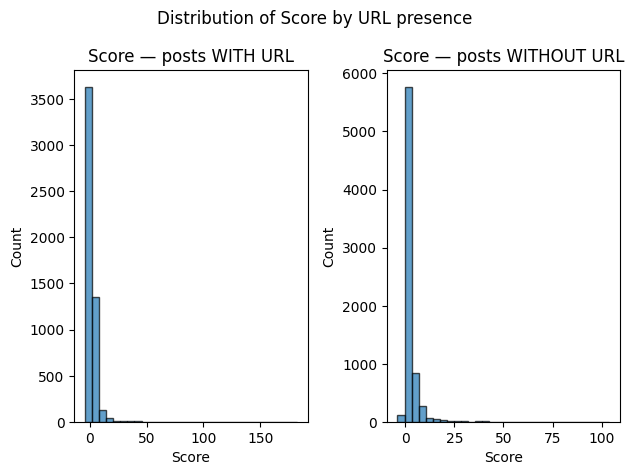

In [ ]:
# Your code below here: 
# 5a. Splitting dataframes 
url_count = posts_df["BodyURLs"].map(len)
posts_with_url = posts_df[url_count > 0].copy()
posts_without_url = posts_df[url_count == 0].copy()

# 5b. Descriptive statistics for Score in both groups
print("Posts WITH URL - Score:")
print(f"  Mean:   {posts_with_url['Score'].mean():.2f}")
print(f"  Median: {posts_with_url['Score'].median():.2f}")
print(f"  Std:    {posts_with_url['Score'].std():.2f}")
print("Posts WITHOUT URL - Score:")
print(f"  Mean:   {posts_without_url['Score'].mean():.2f}")
print(f"  Median: {posts_without_url['Score'].median():.2f}")
print(f"  Std:    {posts_without_url['Score'].std():.2f}")

# 5c. Significance: Score (vote counts) is typically right-skewed, not normal, so we prefer a NON-PARAMETRIC test (Mann-Whitney U). Still report the parametric t-test for comparison.
t_stat, t_p = stats.ttest_ind(posts_with_url["Score"], posts_without_url["Score"])
u_stat, u_p = stats.mannwhitneyu(posts_with_url["Score"], posts_without_url["Score"], alternative="two-sided")
print("Parametric (t-test):", t_stat, t_p)
print("Non-parametric (Mann-Whitney U):", u_stat, u_p)

# 5d. Histograms
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(posts_with_url["Score"], bins=30, edgecolor="black", alpha=0.7)
ax1.set_title("Score — posts WITH URL")
ax1.set_xlabel("Score")
ax1.set_ylabel("Count")
ax2.hist(posts_without_url["Score"], bins=30, edgecolor="black", alpha=0.7)
ax2.set_title("Score — posts WITHOUT URL")
ax2.set_xlabel("Score")
ax2.set_ylabel("Count")
fig.suptitle("Distribution of Score by URL presence")
plt.tight_layout()
plt.show()

# Exercise 6. Choose a different variable and repeat

Instead of using "Score", explore the data set and select or create a variable. Then compare that variable between two groups. They can be different groups than "do or don't have a URL". Posit a reason why those groups would be significantly different. Report:
- Mean score
- Median score
- A plot of the numeric value for each of the groups separately
- A t-test (parametric or non-parametric)
- And give a short interpretation of your findings. 

In [ ]:
# Your code below here:

# AI Declaration 



The code was written primarily by myself. I used Claude for a few reminders here and there (like `plt.yscale` vs `ax1.set_yscale()`). 